In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px

In [17]:
data = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")


In [18]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [19]:
data.shape

(3999, 12)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [21]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [22]:
data = data.drop('ID#', axis=1)
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [23]:
data = data.fillna(data.mean())
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [24]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
filtered = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered.shape

(2875, 11)

In [25]:
scaler = StandardScaler()
scaled = scaler.fit_transform(filtered)
scaled_df = pd.DataFrame(scaled, columns=filtered.columns)
scaled_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072


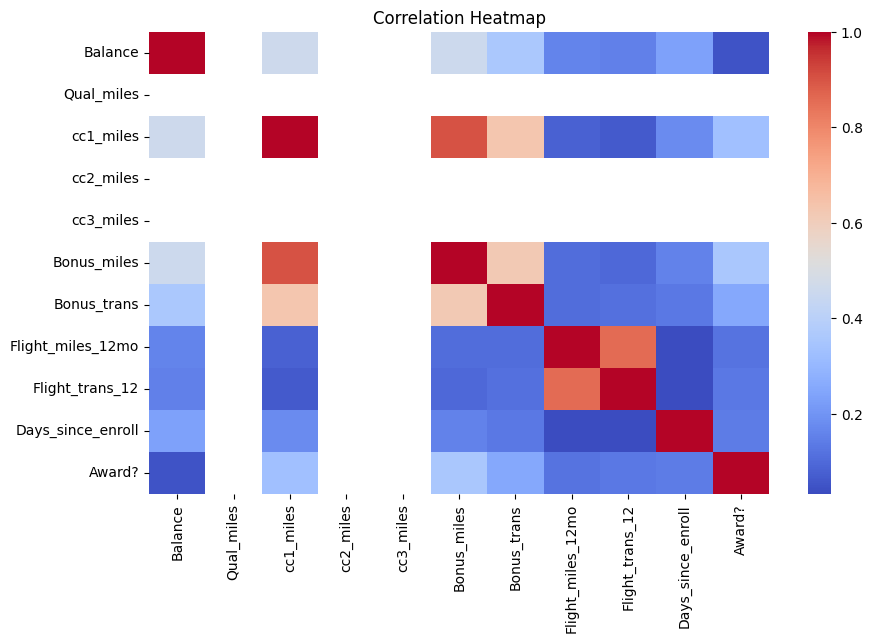

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(scaled_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

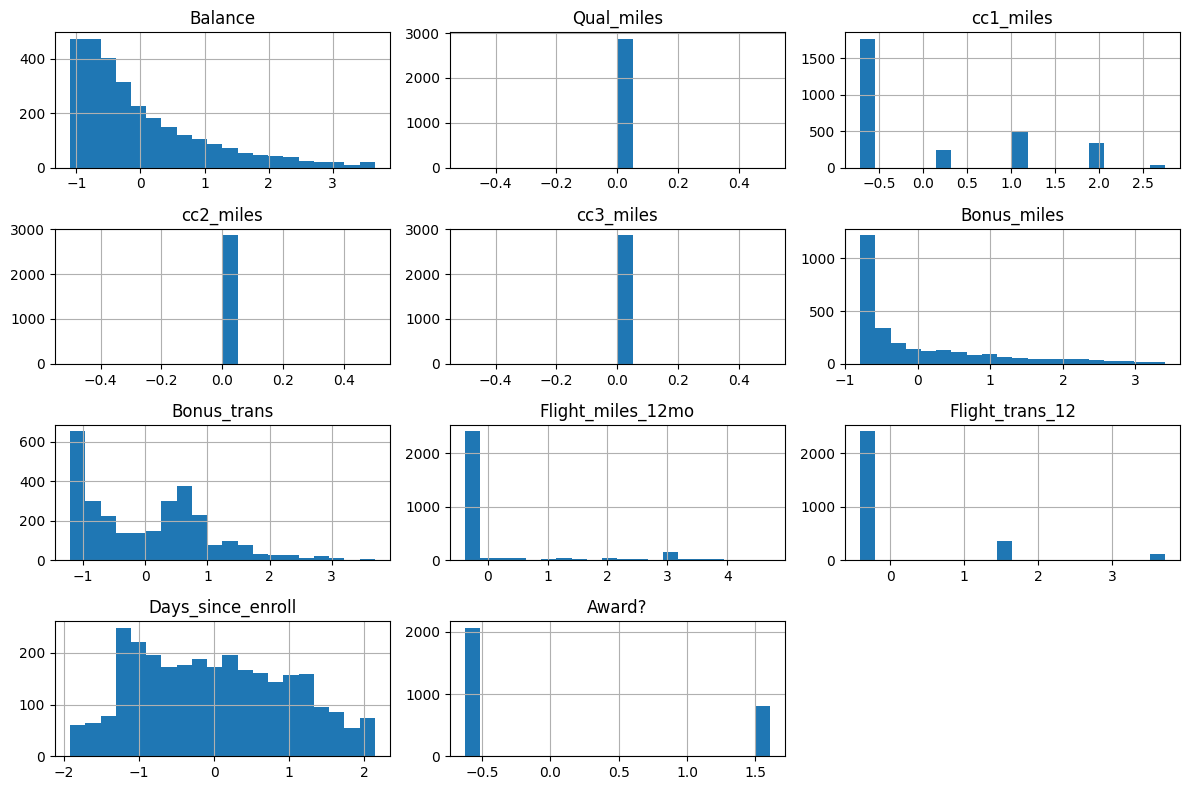

In [27]:
scaled_df.hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

In [28]:
inertia = []
k_values = range(2,11)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

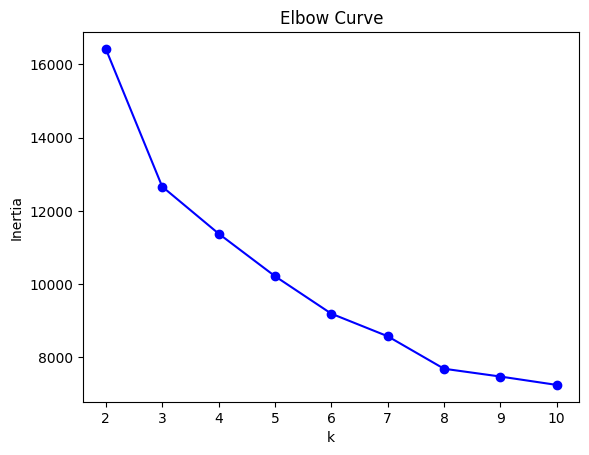

In [29]:
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
scaled_df['KMeans_Cluster'] = kmeans_labels

In [31]:
sil_kmeans = silhouette_score(scaled_df, kmeans_labels)
sil_kmeans

0.36626738786939667

In [42]:
fig = px.scatter_matrix(
    scaled_df,
    dimensions=scaled_df.columns[:-1],
    color=scaled_df['KMeans_Cluster'].astype(str),
    title="K-Means Cluster Distribution"
)
fig.write_html("kmeans_clusters.html")
print("Run this HTML file into your browswer.")


Run this HTML file into your browswer.


In [34]:
db = DBSCAN(eps=1.8, min_samples=6)
db_labels = db.fit_predict(scaled_df)
scaled_df['DBSCAN_Cluster'] = db_labels

In [35]:
if len(set(db_labels)) > 1:
    sil_db = silhouette_score(scaled_df, db_labels)
else:
    sil_db = None
sil_db

0.3730436158470118

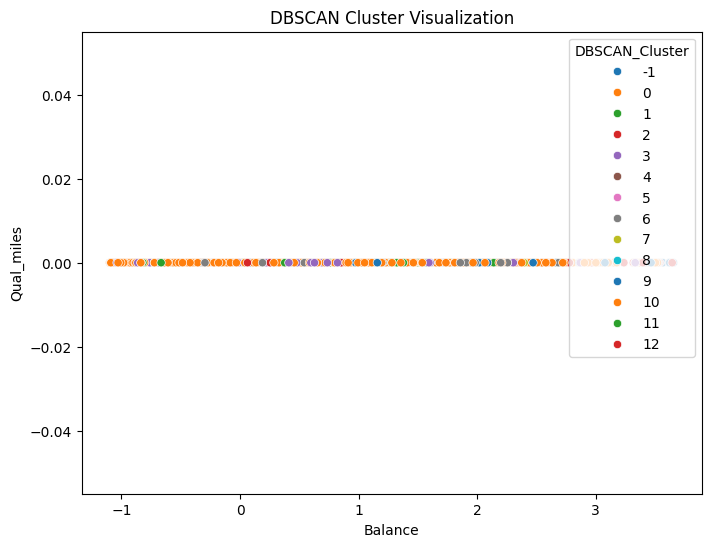

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scaled_df.iloc[:,0],
    y=scaled_df.iloc[:,1],
    hue=scaled_df['DBSCAN_Cluster'],
    palette='tab10'
)
plt.title('DBSCAN Cluster Visualization')
plt.show()

In [37]:
scaled_df['KMeans_Cluster'].value_counts()

KMeans_Cluster
4    810
2    673
3    620
1    432
0    340
Name: count, dtype: int64

In [38]:
scaled_df['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0     1805
 3      406
 2      199
 1      120
 6      120
-1       66
 7       46
 11      30
 4       22
 5       18
 10      16
 8       15
 9        6
 12       6
Name: count, dtype: int64

In [39]:
scaled_df.groupby('KMeans_Cluster').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,
0,0.423275,0.0,0.193236,0.0,0.0,0.257460,0.306879,2.521148,2.314519,0.092053,0.353327,4.029412
1,-0.320523,0.0,-0.067233,0.0,0.0,-0.084422,0.052960,-0.330816,-0.285552,0.110410,1.604952,2.879630
2,-0.219043,0.0,-0.598039,0.0,0.0,-0.583477,-0.454383,-0.350517,-0.333077,0.781096,-0.623072,0.139673
3,0.914741,0.0,1.419050,0.0,0.0,1.334047,0.928742,-0.319988,-0.273291,0.303562,0.178298,0.948387
4,-0.524903,0.0,-0.634552,0.0,0.0,-0.599378,-0.490418,-0.345664,-0.333304,-0.978866,-0.623072,0.407407
